In [1]:
import pandas as pd
import requests
import os
import json
import matplotlib.pyplot as plt
import pylab
import numpy as py
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

# Gathering

- Twitter-archive-enhanced CSV File
- Twitter API's offline JSON file

In [2]:
#The WeRateDogs Twitter archive.
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#The tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'twitter-image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
# Use tweet_json.txt
with open('tweet_json.txt') as file:
    data = json.load(file)

In [5]:
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8831,39442
1,892177421306343426,6470,33747
2,891815181378084864,4291,25418
3,891689557279858688,8907,42806
4,891327558926688256,9690,40946


# Assessing 
Now we asses the 3 data frames with info() and describe() methods for programatically assessments

1. twitter_archive_df gathered from twitter-archive-enhanced.csv (tweets texts).
2. img_predictions_df from image-predictions.tsv that predicts dog stages/breeds.
3. tweets_df from offline JSON File 'tweet_json.txt' that contains counts of favorites and retweets.

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id     2351 non-null object
retweets     2351 non-null int64
favorites    2351 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [7]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tweets_df.describe()

,retweets,favorites
count,2351.000000,2351.000000
mean,3131.396852,8111.893662
std,5238.522870,11989.498195
min,0.000000,0.000000
25%,617.000000,1419.000000
50%,1453.000000,3594.000000
75%,3622.500000,10115.500000
max,79007.000000,132170.000000


In [10]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
all_columns = pd.Series(list(tweets_df) + list(twitter_archive_df) + list(img_predictions_df))
all_columns

0                       tweet_id
1                       retweets
2                      favorites
3                       tweet_id
4          in_reply_to_status_id
5            in_reply_to_user_id
6                      timestamp
7                         source
8                           text
9            retweeted_status_id
10      retweeted_status_user_id
11    retweeted_status_timestamp
12                 expanded_urls
13              rating_numerator
14            rating_denominator
15                          name
16                         doggo
17                       floofer
18                        pupper
19                         puppo
20                      tweet_id
21                       jpg_url
22                       img_num
23                            p1
24                       p1_conf
25                        p1_dog
26                            p2
27                       p2_conf
28                        p2_dog
29                            p3
30        

In [13]:
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [14]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:

img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
tweets_df.describe()


,retweets,favorites
count,2351.000000,2351.000000
mean,3131.396852,8111.893662
std,5238.522870,11989.498195
min,0.000000,0.000000
25%,617.000000,1419.000000
50%,1453.000000,3594.000000
75%,3622.500000,10115.500000
max,79007.000000,132170.000000


# Issues

- Data types validity
    
    1- twitter_archive_df
        1.1- tweet_id is int
        1.2- timestamp is str
        1.3- in_reply_to_status_id is float
        1.4- in_reply_to_user_id is float
        1.5- retweeted_status_id is float
        1.6- retweeted_status_user_id is float
        1.7- retweeted_status_timestamp is str
    
    2- img_predictions_df
        2.1- tweet_id is int
        
    3- tweets_df
        3.1- favourites is float 
        3.2- retweets is float

- Tidiness

    1- dog stages/breeds in multiple columns.
    2- the three tables should be merged into one table.


# CLEAN

In [17]:

twitter_archive_clean = twitter_archive_df.copy()
tweets_clean = tweets_df.copy()
img_pred_clean = img_predictions_df.copy()

In [18]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Cast tweet_id data type to String in twitter_archive_clean and img_pred_clean
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)

#Merge 3 data frames to each other 
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
twitter_archive_clean = pd.merge(twitter_archive_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 30 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2072 non-null object
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           78 non-null float64
retweeted_status_user_id      78 non-null float64
retweeted_status_timestamp    78 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
doggo                         2072 non-null object
floofer                       2072 non-null object
pupper                        2072 non-null object
puppo                         2072 non-null object
retweets                      2072

In [22]:
img_pred_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [23]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 30 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2072 non-null object
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           78 non-null float64
retweeted_status_user_id      78 non-null float64
retweeted_status_timestamp    78 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
doggo                         2072 non-null object
floofer                       2072 non-null object
pupper                        2072 non-null object
puppo                         2072 non-null object
retweets                      2072

In [25]:
#Melt all dogs stages into one columns

twitter_archive_clean = pd.melt(twitter_archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'],
                        value_name='unified_dog_stage')
twitter_archive_clean = twitter_archive_clean.drop('variable', axis=1)

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 27 columns):
tweet_id                      8288 non-null object
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8288 non-null object
source                        8288 non-null object
text                          8288 non-null object
retweeted_status_id           312 non-null float64
retweeted_status_user_id      312 non-null float64
retweeted_status_timestamp    312 non-null object
expanded_urls                 8288 non-null object
rating_numerator              8288 non-null int64
rating_denominator            8288 non-null int64
name                          8288 non-null object
retweets                      8288 non-null int64
favorites                     8288 non-null int64
jpg_url                       8288 non-null object
img_num                       8288 non-null int64
p1                            8288

In [27]:
twitter_archive_clean.unified_dog_stage.value_counts()

None       7954
pupper      222
doggo        80
puppo        24
floofer       8
Name: unified_dog_stage, dtype: int64

In [28]:
# Drop duplicated of dogs types
duplicates_df1 = twitter_archive_clean.drop_duplicates(subset=['tweet_id', 'unified_dog_stage']) 
duplicates_df1 = twitter_archive_clean.drop_duplicates()

In [29]:
#Remove dog stages with type 'None'
duplicates_tweet_ids = twitter_archive_clean.duplicated(subset='tweet_id', keep = False)
duplicates_df2 = twitter_archive_clean[duplicates_tweet_ids]
duplicates_df2 = duplicates_df2[duplicates_df2.unified_dog_stage != 'None']

In [30]:
#Merge

duplicates_df1 = duplicates_df1.drop_duplicates(subset = 'tweet_id', keep = False)
duplicates_df_merged = duplicates_df1.append(duplicates_df2)
twitter_archive_clean = duplicates_df_merged

In [31]:
duplicates_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2085 non-null object
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           80 non-null float64
retweeted_status_user_id      80 non-null float64
retweeted_status_timestamp    80 non-null object
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null int64
rating_denominator            2085 non-null int64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
img_num                       2085 non-null int64
p1                            2085 no

In [32]:
#Chack if there are remaining duplicates in data 

remaining_duplicates_df = duplicates_df_merged[duplicates_df_merged.duplicated(subset='tweet_id', keep=False)]
remaining_duplicates_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,unified_dog_stage
153,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,doggo
159,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,doggo
365,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
428,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,...,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,doggo
456,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,...,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,doggo
462,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,...,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,doggo
564,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,...,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,doggo
625,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,...,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,doggo
664,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,...,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,doggo
721,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,...,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,doggo


In [33]:
remaining_duplicates_df[remaining_duplicates_df.tweet_id == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,unified_dog_stage
365,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4509,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [34]:
remaining_duplicates_df[remaining_duplicates_df.tweet_id == '854010172552949760']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,unified_dog_stage
159,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,doggo
2231,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,floofer


In [35]:
# Crate new type for Multiple rows with different dog stages and breeds called (multiple_stages)

remaining_duplicates_df.unified_dog_stage = 'multiple_stages'
duplicates_drops = remaining_duplicates_df.drop_duplicates()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
#check tweet with id 817777686764523521 and  854010172552949760 after refinement
duplicates_drops[duplicates_drops.tweet_id == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,unified_dog_stage
365,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,multiple_stages


In [37]:
duplicates_drops[duplicates_drops.tweet_id == '854010172552949760']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,unified_dog_stage
159,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,multiple_stages


In [38]:
duplicatesed_ids = set(remaining_duplicates_df.tweet_id)
for idx in duplicates_df_merged.tweet_id:
    if idx in duplicatesed_ids:
        duplicates_df_merged.unified_dog_stage[duplicates_df_merged.tweet_id == idx] = 'multiple_stages'
archive_clean = duplicates_df_merged.drop_duplicates()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [39]:
twitter_archive_clean.unified_dog_stage.value_counts()

None               1751
pupper              211
doggo                67
multiple_stages      26
puppo                23
floofer               7
Name: unified_dog_stage, dtype: int64

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2085 non-null object
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           80 non-null float64
retweeted_status_user_id      80 non-null float64
retweeted_status_timestamp    80 non-null object
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null int64
rating_denominator            2085 non-null int64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
img_num                       2085 non-null int64
p1                            2085 no

In [41]:
# Continue cleaning remaining data types
# Convert timestambs to dateObject 

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)


In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           80 non-null float64
retweeted_status_user_id      80 non-null float64
retweeted_status_timestamp    80 non-null datetime64[ns]
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null int64
rating_denominator            2085 non-null int64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
img_num                       2085 non-null int64
p1                   

In [43]:
#Convert any Ids to string 

twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype(str)

#convert umerators and denominators

twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         2085 non-null object
in_reply_to_user_id           2085 non-null object
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           2085 non-null object
retweeted_status_user_id      2085 non-null object
retweeted_status_timestamp    80 non-null datetime64[ns]
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null float64
rating_denominator            2085 non-null float64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
img_num                       2085 non-null int64
p1           

In [45]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,unified_dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [46]:
#twitter_archive_clean.name.value_counts()

In [47]:
#Sample of non-valid names that I get them visually 

twitter_archive_clean.text[twitter_archive_clean.name =='a']
twitter_archive_clean.text[twitter_archive_clean.name =='an']

608     RT @dog_rates: This is an East African Chalupa...
837     This is an Iraqi Speed Kangaroo. It is not a d...
1141    This is an East African Chalupa Seal. We only ...
1922    This is an Irish Rigatoni terrier named Berta....
2049    This is an extremely rare horned Parthenon. No...
2051    This is an Albanian 3 1/2 legged  Episcopalian...
2065    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [48]:
#twitter_archive_clean.name.tolist()

In [49]:
# clean non-valid names 

non_valid_names = ['a', 'an', 'the', 'just', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all' ,'one', 'very','such', 'getting']

for name in twitter_archive_clean.name:
    if name in non_valid_names:
        twitter_archive_clean.name[twitter_archive_clean.name == name] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
twitter_archive_clean.text[twitter_archive_clean.name =='a']
twitter_archive_clean.text[twitter_archive_clean.name =='an']
twitter_archive_clean.text[twitter_archive_clean.name =='the']
twitter_archive_clean.text[twitter_archive_clean.name =='just']
twitter_archive_clean.text[twitter_archive_clean.name =='quite']
twitter_archive_clean.text[twitter_archive_clean.name =='actually']
twitter_archive_clean.text[twitter_archive_clean.name =='mad']

twitter_archive_clean.text[twitter_archive_clean.name =='space']
twitter_archive_clean.text[twitter_archive_clean.name =='infuriating']
twitter_archive_clean.text[twitter_archive_clean.name =='actually']
twitter_archive_clean.text[twitter_archive_clean.name =='all']
twitter_archive_clean.text[twitter_archive_clean.name =='one']
twitter_archive_clean.text[twitter_archive_clean.name =='very']


### Should be clean 

Series([], Name: text, dtype: object)

In [51]:
#twitter_archive_clean.name.tolist()

In [52]:
#convert unified dog stage to category
twitter_archive_clean.unified_dog_stage = twitter_archive_clean.unified_dog_stage.astype('category')

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         2085 non-null object
in_reply_to_user_id           2085 non-null object
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           2085 non-null object
retweeted_status_user_id      2085 non-null object
retweeted_status_timestamp    80 non-null datetime64[ns]
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null float64
rating_denominator            2085 non-null float64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
img_num                       2085 non-null int64
p1           

In [54]:
twitter_archive_clean["unified_dog_stage"].replace({"None": np.nan}, inplace=True)

In [55]:
twitter_archive_clean.unified_dog_stage.value_counts()

pupper             211
doggo               67
multiple_stages     26
puppo               23
floofer              7
Name: unified_dog_stage, dtype: int64

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         2085 non-null object
in_reply_to_user_id           2085 non-null object
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           2085 non-null object
retweeted_status_user_id      2085 non-null object
retweeted_status_timestamp    80 non-null datetime64[ns]
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null float64
rating_denominator            2085 non-null float64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
img_num                       2085 non-null int64
p1           

In [57]:
# Rename Columns name to more accurate 

twitter_archive_clean = twitter_archive_clean.rename(columns={'p1': 'prediction_1', 'p2': 'prediction_2',
                                                             'p3': 'prediction_3','p1_conf': 'prediction_1_confidence','p2_conf': 'prediction_2_confidence','p3_conf': 'prediction_3_confidence',
                                                             'p1_dog':'is_prediction_1_dog_breed','p2_dog':'is_prediction_2_dog_breed','p3_dog':'is_prediction_3_dog_breed','img_num':'dog_image_number'})

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         2085 non-null object
in_reply_to_user_id           2085 non-null object
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           2085 non-null object
retweeted_status_user_id      2085 non-null object
retweeted_status_timestamp    80 non-null datetime64[ns]
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null float64
rating_denominator            2085 non-null float64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
dog_image_number              2085 non-null int64
prediction_1 

In [59]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction_1,prediction_1_confidence,is_prediction_1_dog_breed,prediction_2,prediction_2_confidence,is_prediction_2_dog_breed,prediction_3,prediction_3_confidence,is_prediction_3_dog_breed,unified_dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [60]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2044
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [61]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x:BeautifulSoup(x, "lxml").text)

In [62]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction_1,prediction_1_confidence,is_prediction_1_dog_breed,prediction_2,prediction_2_confidence,is_prediction_2_dog_breed,prediction_3,prediction_3_confidence,is_prediction_3_dog_breed,unified_dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [63]:
twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'], axis=1, inplace=True)

In [64]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,prediction_1,prediction_1_confidence,is_prediction_1_dog_breed,prediction_2,prediction_2_confidence,is_prediction_2_dog_breed,prediction_3,prediction_3_confidence,is_prediction_3_dog_breed,unified_dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8831,39442,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6470,33747,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4291,25418,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8907,42806,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9690,40946,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [65]:
#SAve clean data 

twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

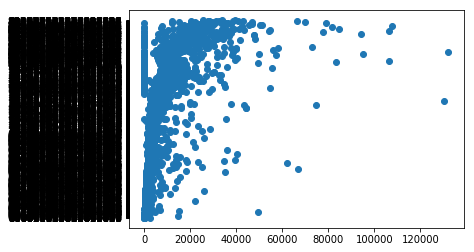

In [66]:
# Analysis and visualisation

plt.scatter(twitter_archive_clean.favorites,twitter_archive_clean.tweet_id);
plt.show()

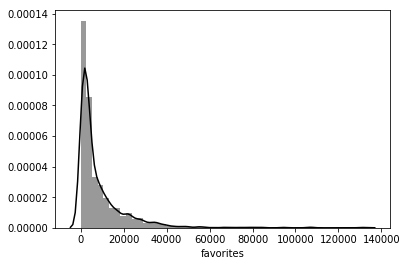

In [67]:
sns.distplot(twitter_archive_clean.favorites, color = 'black', label = 'Favorites');

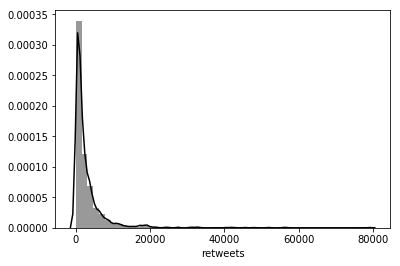

In [68]:
sns.distplot(twitter_archive_clean.retweets, color = 'black', label = 'Retweets');

Text(0.5,1,'All dog stages')

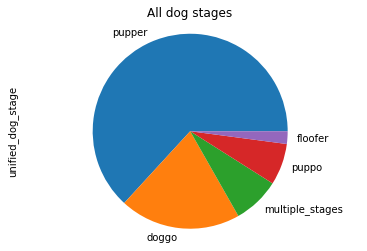

In [69]:
#Now make a pie chart
twitter_archive_clean.unified_dog_stage.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('All dog stages')

In [70]:
twitter_archive_clean.unified_dog_stage.value_counts()

pupper             211
doggo               67
multiple_stages     26
puppo               23
floofer              7
Name: unified_dog_stage, dtype: int64

In [71]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 22 columns):
tweet_id                     2085 non-null object
timestamp                    2085 non-null datetime64[ns]
source                       2085 non-null object
text                         2085 non-null object
expanded_urls                2085 non-null object
rating_numerator             2085 non-null float64
rating_denominator           2085 non-null float64
name                         2085 non-null object
retweets                     2085 non-null int64
favorites                    2085 non-null int64
jpg_url                      2085 non-null object
dog_image_number             2085 non-null int64
prediction_1                 2085 non-null object
prediction_1_confidence      2085 non-null float64
is_prediction_1_dog_breed    2085 non-null bool
prediction_2                 2085 non-null object
prediction_2_confidence      2085 non-null float64
is_prediction_2_dog_breed    2085 no

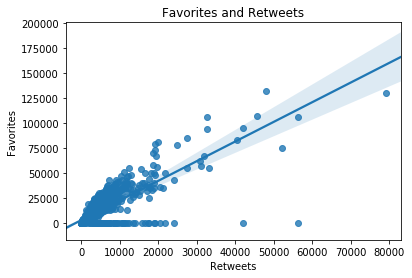

In [72]:
#This Graph shoes correlation between favorites and retweets

sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()

In [82]:
twitter_archive_clean.name.value_counts()

None            677
Charlie          11
Cooper           10
Tucker           10
Penny            10
Lucy             10
Oliver           10
Sadie             8
Bo                8
Winston           8
Lola              8
Toby              7
Daisy             7
Koda              6
Rusty             6
Bella             6
Jax               6
Scout             6
Dave              6
Milo              6
Bailey            6
Stanley           6
Chester           5
Oscar             5
Maggie            5
Alfie             5
Leo               5
Louis             5
Buddy             5
Larry             5
               ... 
Zooey             1
Wafer             1
Fletcher          1
Vixen             1
Jay               1
Tessa             1
Lucia             1
Rorie             1
Harry             1
Ralphson          1
Jim               1
Julius            1
Aldrick           1
Samsom            1
Strudel           1
Sweet             1
Florence          1
Jaspers           1
Comet             1


In [ ]:
twitter_archive_clean.name

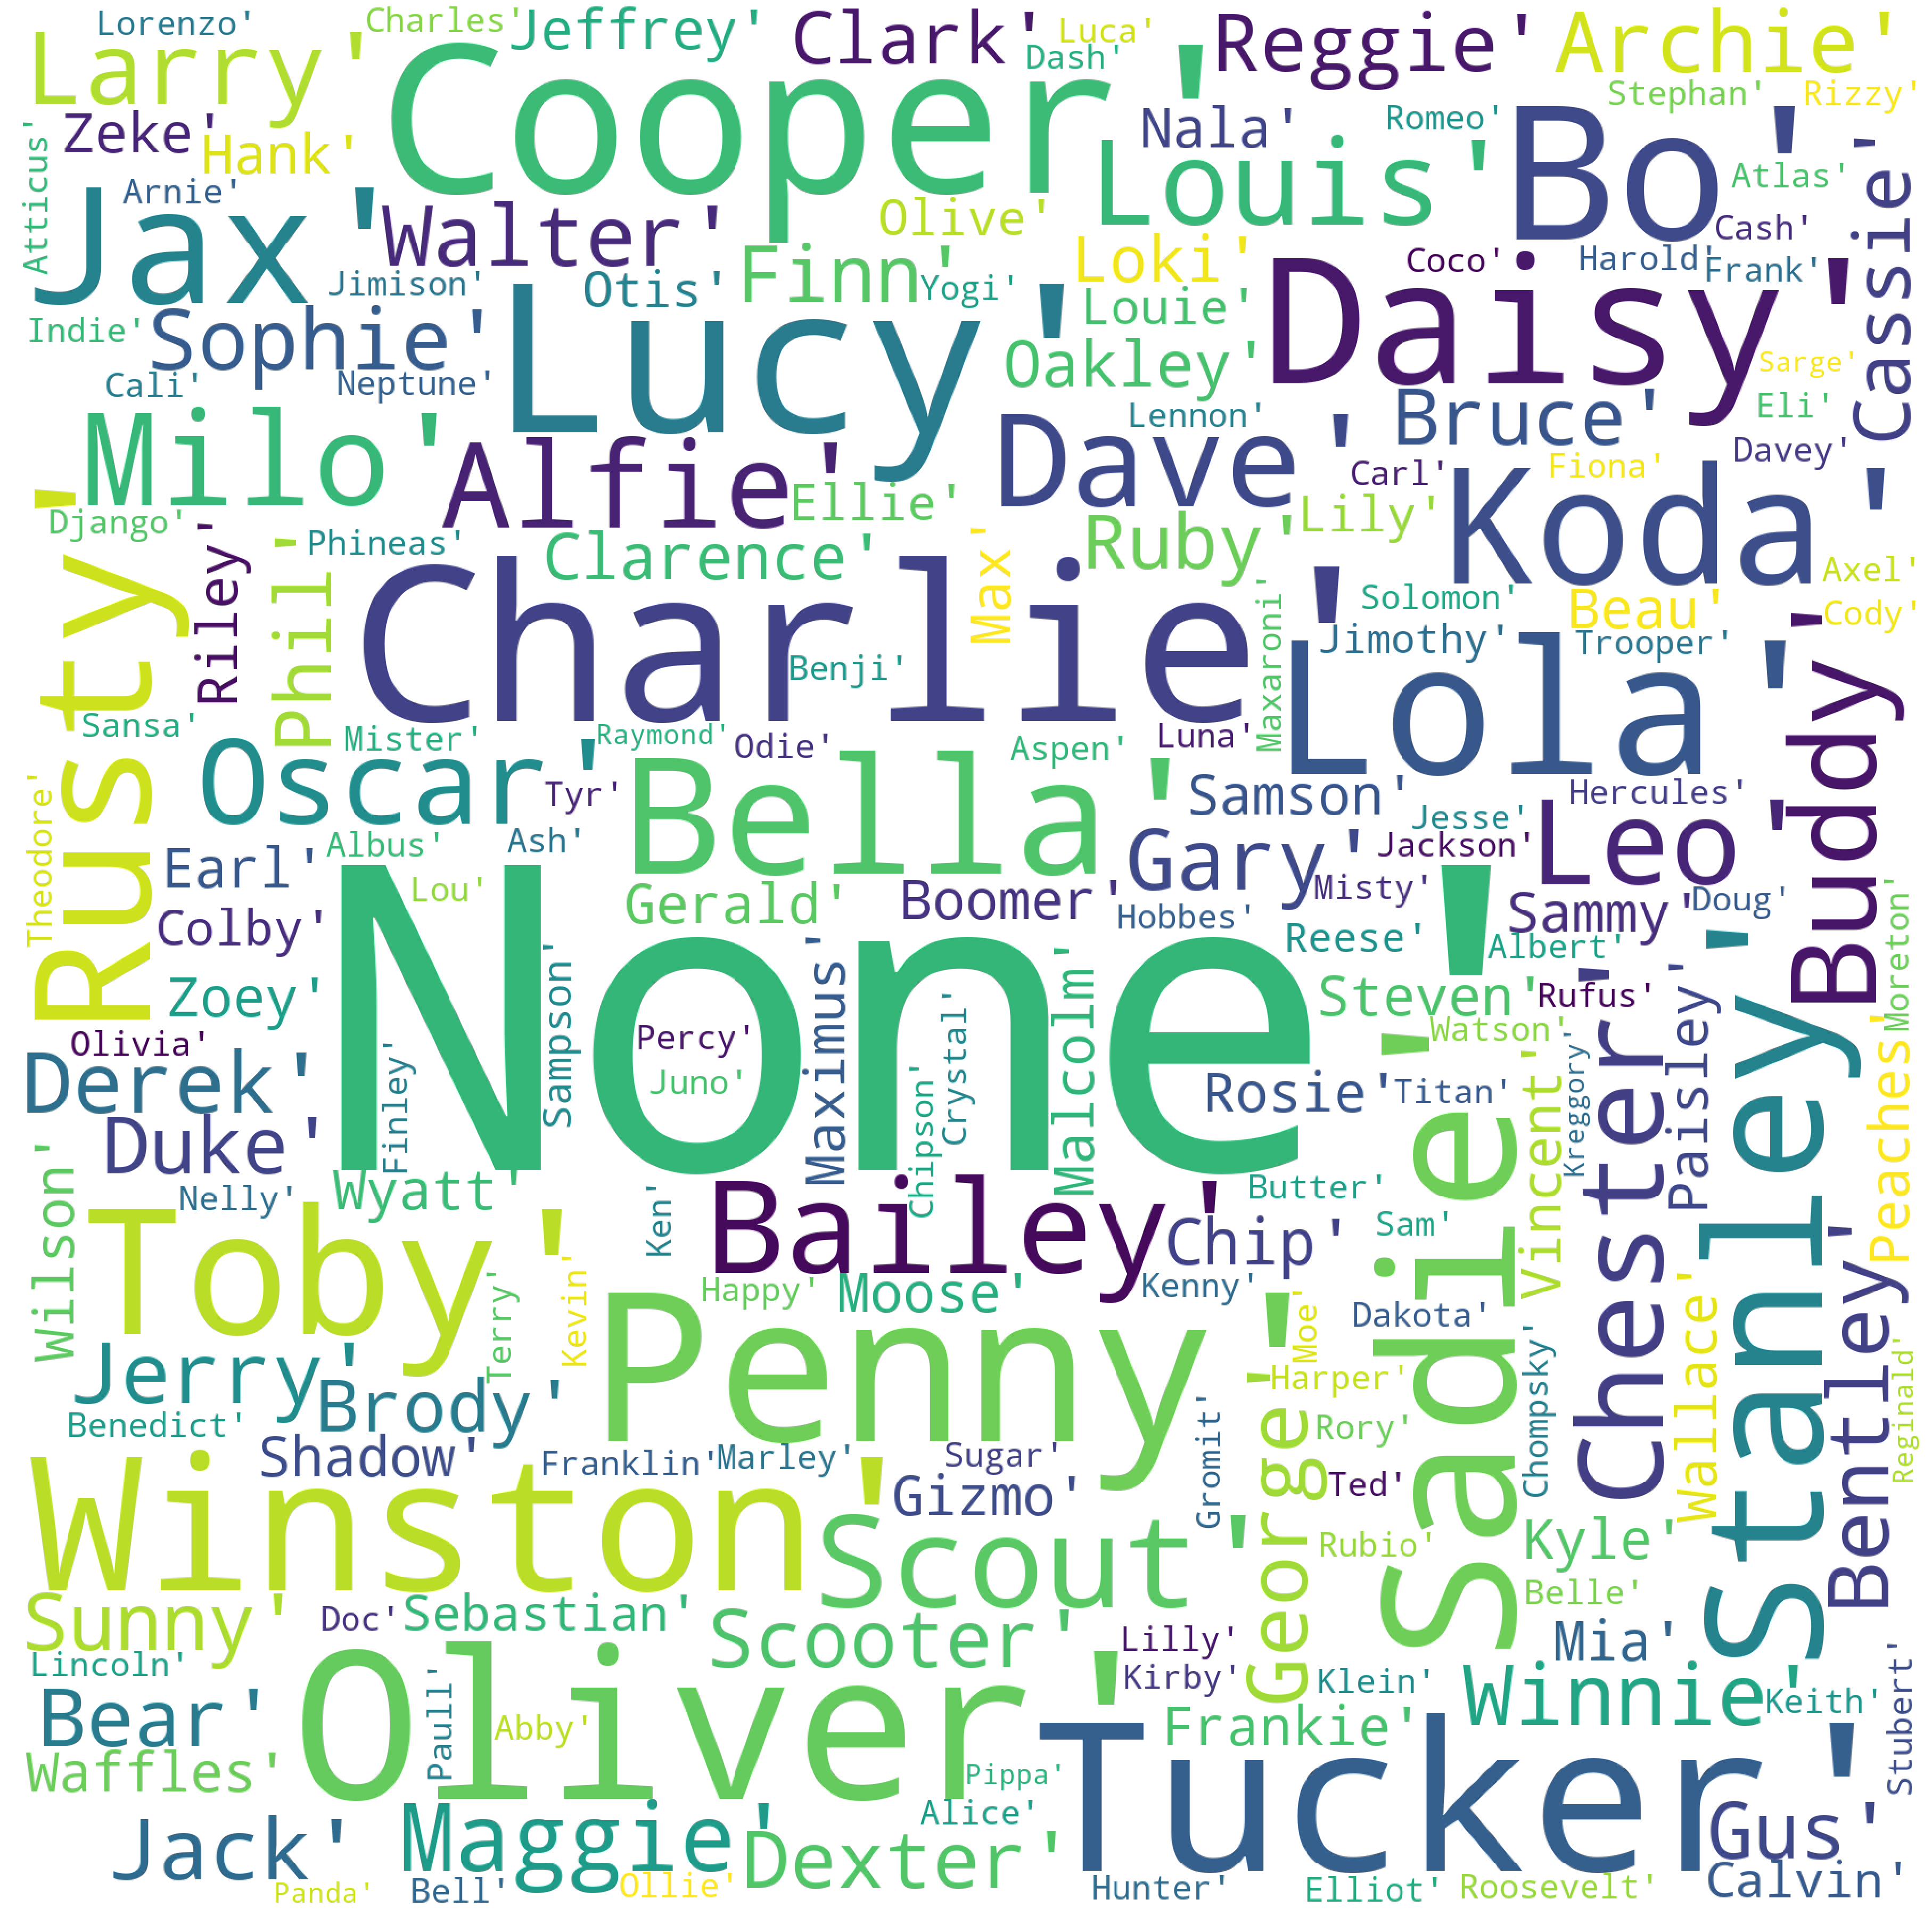

In [81]:
text = list(twitter_archive_clean.name.values)
wordcloud = WordCloud(width = 1800, height = 1800, 
            background_color ='white', min_font_size = 10).generate(str(text))

 #plot the WordCloud image                        
plt.figure(figsize = (50, 50), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 